## ARIMA (Autoregressive Integrated Moving Average) Model for Forcasting:

In [1]:
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [2]:
variables = pandas.read_csv('wqfull.csv')
variables.dropna(inplace=True)
price = variables['106605_00095_cd']

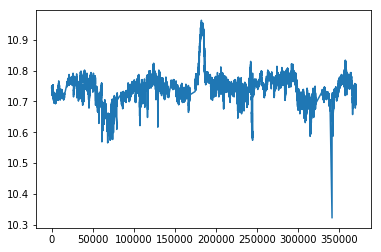

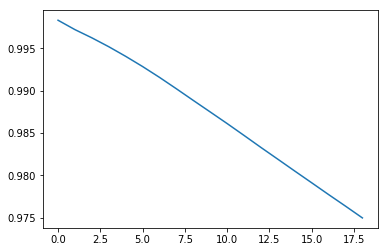

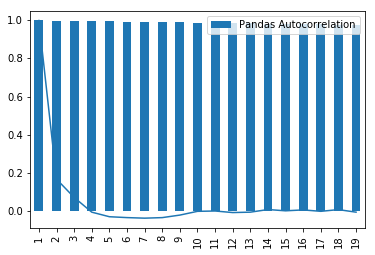

(-14.240360778859765,
 1.541445889982479e-26,
 1,
 340311,
 {'1%': -3.4303692158035624,
  '10%': -2.5667745205951444,
  '5%': -2.8615484931502126},
 -3110595.664393204)

In [3]:
lnprice=np.log(price)
lnprice
plt.plot(lnprice)
plt.show()
acf_1 =  acf(lnprice)[1:20]
plt.plot(acf_1)
plt.show()
test_df = pandas.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 =  pacf(lnprice)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pandas.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
result = ts.adfuller(lnprice, 1)
result

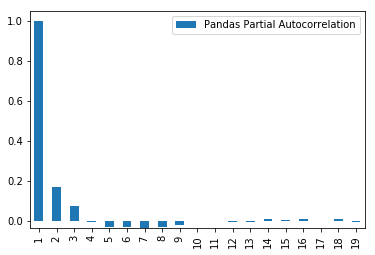

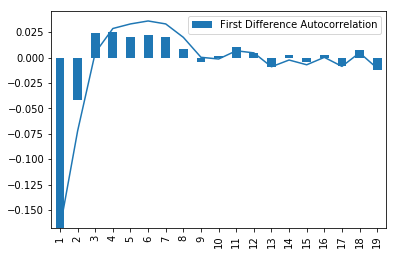

In [4]:
lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff =  acf(diff)[1:20]
test_df = pandas.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff =  pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

In [5]:
price_matrix=lnprice.as_matrix()
model = ARIMA(price_matrix, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:               340312
Model:                 ARIMA(1, 1, 0)   Log Likelihood             1555204.523
Method:                       css-mle   S.D. of innovations              0.003
Date:                Thu, 26 Jul 2018   AIC                       -3110403.046
Time:                        11:19:36   BIC                       -3110370.834
Sample:                             1   HQIC                      -3110393.779
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.24e-09   3.68e-06      0.001      0.999   -7.21e-06    7.21e-06
ar.L1.D.y     -0.1679      0.002    -99.335      0.000      -0.171      -0.165
                                    Roots           

In [6]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
series = read_csv('test.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = series.dropna()
model = ARIMA(series, order=(1,0,0))
model_fit = model.fit()

/home/reem/.local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [7]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:        106605_00095_cd   No. Observations:               340313
Model:                     ARMA(1, 0)   Log Likelihood            -2090194.036
Method:                       css-mle   S.D. of innovations            112.508
Date:                Thu, 26 Jul 2018   AIC                        4180394.071
Time:                        11:19:43   BIC                        4180426.284
Sample:                             0   HQIC                       4180403.339
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.631e+04    129.491    357.648      0.000    4.61e+04    4.66e+04
ar.L1.106605_00095_cd     0.9985   9.32e-05   1.07e+04      0.000       0.998       0.999
        

## 2

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

series = read_csv('test.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
series = DataFrame(series)
series['106605_00095_cd']

In [ ]:
series.iloc[1]

In [ ]:
series = series.dropna()
autocorrelation_plot(series)
pyplot.figure(figsize=(16,8))
pyplot.show()

In [ ]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

series = read_csv('test.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = series.dropna()
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())